In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
!pip install -q kaggle

In [16]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [17]:
!cp kaggle.json ~/.kaggle/

In [18]:
! kaggle datasets download -d gunavenkatdoddi/eye-diseases-classification

eye-diseases-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [19]:
!unzip '/content/drive/MyDrive/archive.zip'

Archive:  /content/drive/MyDrive/archive.zip
replace dataset/cataract/0_left.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: dataset/cataract/0_left.jpg  
  inflating: dataset/cataract/103_left.jpg  
  inflating: dataset/cataract/1062_right.jpg  
  inflating: dataset/cataract/1083_left.jpg  
  inflating: dataset/cataract/1084_right.jpg  
  inflating: dataset/cataract/1102_left.jpg  
  inflating: dataset/cataract/1102_right.jpg  
  inflating: dataset/cataract/1115_left.jpg  
  inflating: dataset/cataract/1126_right.jpg  
  inflating: dataset/cataract/112_right.jpg  
  inflating: dataset/cataract/1144_left.jpg  
  inflating: dataset/cataract/1144_right.jpg  
  inflating: dataset/cataract/1164_left.jpg  
  inflating: dataset/cataract/1167_right.jpg  
  inflating: dataset/cataract/119_left.jpg  
  inflating: dataset/cataract/1285_left.jpg  
  inflating: dataset/cataract/1415_left.jpg  
  inflating: dataset/cataract/1415_right.jpg  
  inflating: dataset/cataract/1435_left.jpg  
  

In [20]:
Data = '/content/dataset'

In [21]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
import splitfolders

In [27]:
splitfolders.ratio(Data, output="output", seed=1337, ratio=(.8, 0.2))

Copying files: 4217 files [00:03, 1121.57 files/s]


In [28]:
import os

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

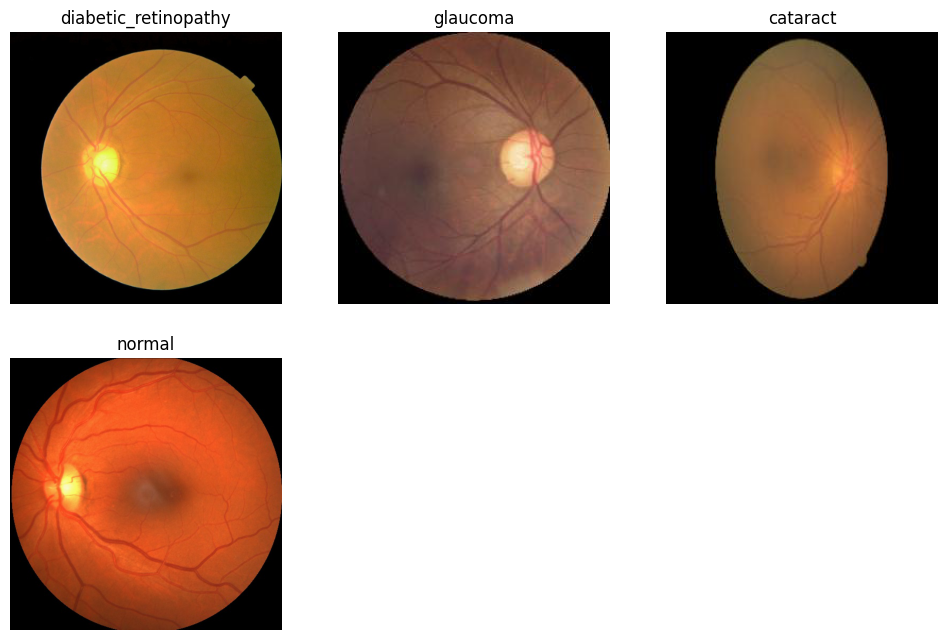

In [30]:
nrows = 3
ncols = 3

pos = 0

for subfolder in os.listdir(Data):
    
    image_file = os.listdir(os.path.join(Data, subfolder))[0]
    
    fig = plt.gcf()
    fig.set_size_inches(ncols * 4, nrows * 4)

    pos += 1
    sp = plt.subplot(nrows, ncols, pos)

    cur_image = mpimg.imread(os.path.join(Data, subfolder, image_file))
    plt.imshow(cur_image)
    plt.title(subfolder)
    plt.axis('Off')

In [31]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [32]:
IMAGE_SIZE = [224, 224]

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [34]:
training_set = train_datagen.flow_from_directory(
'/content/output/train',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/output/val',
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 3372 images belonging to 4 classes.
Found 845 images belonging to 4 classes.


In [35]:
from tensorflow.keras.applications.xception import Xception, preprocess_input

In [36]:
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input

In [37]:
xception = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet',include_top=False)

83683744/83683744 [==============================] - 5s 0us/step


In [38]:
vgg_19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet',include_top=False)

80134624/80134624 [==============================] - 4s 0us/step


In [39]:
for layer in xception.layers:
  layer.trainable = False

In [40]:
#for layer in VGG19.layers:
  #layer.trainable = False

In [41]:
#for layer in VGG19.layers:
  #layer.trainable = False

In [42]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

In [43]:
x = Flatten()(xception.output)

In [44]:
#x = Flatten()(VGG19.output)

In [45]:
prediction = Dense(4, activation='softmax')(x)


In [46]:
model = Model(inputs=xception.input, outputs=prediction)

In [47]:
#model = Model(inputs=VGG19.input, outputs=prediction)

In [48]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [49]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
53/53 [==============================] - 94s 1s/step - loss: 2.7498 - accuracy: 0.6551 - val_loss: 0.9035 - val_accuracy: 0.7893
Epoch 2/50
53/53 [==============================] - 77s 1s/step - loss: 0.8583 - accuracy: 0.7886 - val_loss: 0.7919 - val_accuracy: 0.7929
Epoch 3/50
53/53 [==============================] - 77s 1s/step - loss: 0.6321 - accuracy: 0.8262 - val_loss: 0.6909 - val_accuracy: 0.8166
Epoch 4/50
53/53 [==============================] - 79s 1s/step - loss: 0.7310 - accuracy: 0.8188 - val_loss: 0.6211 - val_accuracy: 0.8462
Epoch 5/50
53/53 [==============================] - 74s 1s/step - loss: 1.1172 - accuracy: 0.7897 - val_loss: 1.4845 - val_accuracy: 0.7870
Epoch 6/50
53/53 [==============================] - 74s 1s/step - loss: 1.0065 - accuracy: 0.8182 - val_loss: 1.1254 - val_accuracy: 0.8130
Epoch 7/50
53/53 [==============================] - 76s 1s/step - loss: 0.6882 - accuracy: 0.8496 - val_loss: 0.6390 - val_accuracy: 0.8544
Epoch 8/50
53/53 [==

In [51]:
model.save('evgg.h5')

In [52]:
loss, accuracy = model.evaluate(test_set,
                                    steps=11, 
                                    verbose=2, 
                                    use_multiprocessing=True, 
                                    workers=2)
print(f'Model performance on test images:\nAccuracy = {accuracy}\nLoss = {loss}')

11/11 - 9s - loss: 0.8998 - accuracy: 0.8722 - 9s/epoch - 815ms/step
Model performance on test images:
Accuracy = 0.8721590638160706
Loss = 0.8998456597328186


In [53]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
model = load_model("/content/evgg.h5")

In [54]:
img = image.load_img(r"/content/output/val/normal/2365_left.jpg",target_size= (224,224))#loading of the image
x = image.img_to_array(img)#image to array
x = np.expand_dims(x,axis = 0)#changing the shape
preds=model.predict(x)
pred=np.argmax(preds,axis=1)
index=['cataract','diabetic_retinopathy','glaucoma','normal']
result=str(index[pred[0]])
result

1/1 [==============================] - 1s 1s/step


'normal'

In [55]:
model.save('evgg.h5')

!tar -zcvf ibm_eye-classification.tgz evgg.h5

evgg.h5


In [13]:

!pip install watson-machine-learning-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
!pip install ibm_watson_machine_learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
from ibm_watson_machine_learning import APIClient

wml_credentials = {
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"gR_IolXQKf9VLp7GcgRarh24x2ullA3iRN_CVg6HtRzM"
}

In [16]:
client = APIClient(wml_credentials)

In [17]:

client

In [18]:
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -------------------------------------------  ------------------------
ID                                    NAME                                         CREATED
3130ff47-4063-4e3e-bf84-c59748de8605  ODIR: Seeing the Big Picture for Eye Health  2023-05-19T18:34:35.446Z
------------------------------------  -------------------------------------------  ------------------------


,ID,NAME,CREATED
0,3130ff47-4063-4e3e-bf84-c59748de8605,ODIR: Seeing the Big Picture for Eye Health,2023-05-19T18:34:35.446Z


In [19]:
space_uid = "3130ff47-4063-4e3e-bf84-c59748de8605"
space_uid

'3130ff47-4063-4e3e-bf84-c59748de8605'

In [20]:
client.set.default_space(space_uid)

'SUCCESS'

In [21]:
client.software_specifications.list()

----------------------------  ------------------------------------  ----  ------------------  --------------------------
NAME                          ID                                    TYPE  STATE               REPLACEMENT
default_py3.6                 0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base  unsupported         runtime-22.2-py3.10
autoai-ts_rt23.1-py3.10       01ce9391-1a79-5a33-94fb-2e134337f314  base  not_provided
kernel-spark3.2-scala2.12     020d69ce-7ac1-5e68-ac1a-31189867356a  base  not_provided
pytorch-onnx_1.3-py3.7-edt    069ea134-3346-5748-b513-49120e15d288  base  not_provided
tensorflow_rt23.1-py3.10      079a91e0-245f-5269-8926-3c20b28f37dc  base  not_provided
scikit-learn_0.20-py3.6       09c5a1d0-9c1e-4473-a344-eb7b665ff687  base  unsupported         runtime-22.2-py3.10
spark-mllib_3.0-scala_2.12    09f4cff0-90a7-5899-b9ed-1ef348aebdee  base  unsupported
pytorch-onnx_rt22.1-py3.9     0b848dd4-e681-5599-be41-b5f6fccc6471  base  create-unsupported  pytorch-onnx_rt22

,NAME,ID,TYPE,STATE,REPLACEMENT
0,default_py3.6,0062b8c9-8b7d-44a0-a9b9-46c416adcbd9,base,unsupported,runtime-22.2-py3.10
1,autoai-ts_rt23.1-py3.10,01ce9391-1a79-5a33-94fb-2e134337f314,base,not_provided,
2,kernel-spark3.2-scala2.12,020d69ce-7ac1-5e68-ac1a-31189867356a,base,not_provided,
3,pytorch-onnx_1.3-py3.7-edt,069ea134-3346-5748-b513-49120e15d288,base,not_provided,
4,tensorflow_rt23.1-py3.10,079a91e0-245f-5269-8926-3c20b28f37dc,base,not_provided,
5,scikit-learn_0.20-py3.6,09c5a1d0-9c1e-4473-a344-eb7b665ff687,base,unsupported,runtime-22.2-py3.10
6,spark-mllib_3.0-scala_2.12,09f4cff0-90a7-5899-b9ed-1ef348aebdee,base,unsupported,
7,pytorch-onnx_rt22.1-py3.9,0b848dd4-e681-5599-be41-b5f6fccc6471,base,create-unsupported,pytorch-onnx_rt22.2-py3.10
8,ai-function_0.1-py3.6,0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda,base,unsupported,runtime-22.2-py3.10
9,shiny-r3.6,0e6e79df-875e-4f24-8ae9-62dcc2148306,base,not_provided,


In [22]:
software_space_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_space_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [30]:
model_details = client.repository.store_model(model="ibm_eye-classification.tgz", meta_props={
    client.repository.ModelMetaNames.NAME:"evgg.h5",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.4-py3.8-horovod",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})
   

Status code: 400, body: {
  "trace": "69ff2428f4a587628f773511a3db0249",
  "errors": [{
    "code": "invalid_request_entity",
    "message": "Invalid request entity: Unsupported model type 'tensorflow_2.4-py3.8-horovod'",
    "more_info": "https://cloud.ibm.com/apidocs/machine-learning"
  }],
  "status_code": "400"
}


ApiRequestFailure: ignored

In [27]:
model_details

NameError: ignored